# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


636


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print('Beginning Data Retrieval')
print('---------------------------')
counter = 0
for city in cities:
    print(f'Processing Record {counter} of set 1 | {city}')
    counter = counter + 1

Beginning Data Retrieval
---------------------------
Processing Record 0 of set 1 | umzimvubu
Processing Record 1 of set 1 | putina
Processing Record 2 of set 1 | banda aceh
Processing Record 3 of set 1 | vaini
Processing Record 4 of set 1 | rikitea
Processing Record 5 of set 1 | ballina
Processing Record 6 of set 1 | new norfolk
Processing Record 7 of set 1 | chuy
Processing Record 8 of set 1 | imeni poliny osipenko
Processing Record 9 of set 1 | illoqqortoormiut
Processing Record 10 of set 1 | pevek
Processing Record 11 of set 1 | college
Processing Record 12 of set 1 | talnakh
Processing Record 13 of set 1 | bethel
Processing Record 14 of set 1 | georgetown
Processing Record 15 of set 1 | mataura
Processing Record 16 of set 1 | poum
Processing Record 17 of set 1 | hermanus
Processing Record 18 of set 1 | coari
Processing Record 19 of set 1 | bermeo
Processing Record 20 of set 1 | rahatgarh
Processing Record 21 of set 1 | barrow
Processing Record 22 of set 1 | kavieng
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"

# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url
# target_city = 'phoenix'

# data = requests.get(query_url + target_city).json()
# print(query_url + target_city)

# data['coord']['lon']
# data['coord']['lat']
# data['main']['temp_max']
# data['main']['humidity']
# data['clouds']['all']
# data['wind']['speed']
# data['main']['temp_max']
# data['dt']
# data['sys']['country']
# data['name']


http://api.openweathermap.org/data/2.5/weather?appid=86289eb3958c4f5dce7e019be000fcf9&units=imperial&q=phoenix


'Phoenix'

In [31]:
city1 = []
Lat = []
Long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date1 = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city1.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
    except KeyError:
        print(f'Skipped City: {city}')

print(len(city1))
print(len(Lat))
print(len(Long))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date1))

### Creating a Datafram 
df = pd.DataFrame({'City': city1,
                   'Lat' : Lat,
                   'Lng' : Long,
                   'Max Temp': maxtemp,
                   'Humidity':humidity,
                   'Cloudiness':cloudiness,
                   'Wind Speed': windspeed,
                   'Country' : country,
                   'Date': date1
                  })




Skipped City: umzimvubu
Skipped City: illoqqortoormiut
Skipped City: taolanaro
Skipped City: tsihombe
Skipped City: attawapiskat
Skipped City: burica
Skipped City: nizhneyansk
Skipped City: nguiu
Skipped City: grand river south east
Skipped City: ozgon
Skipped City: mys shmidta
Skipped City: khonuu
Skipped City: sentyabrskiy
Skipped City: belushya guba
Skipped City: sumbawa
Skipped City: doctor pedro p. pena
Skipped City: samusu
Skipped City: labutta
Skipped City: gulshat
Skipped City: galiwinku
Skipped City: tiruvottiyur
Skipped City: palabuhanratu
Skipped City: bur gabo
Skipped City: artyk
Skipped City: vaitupu
Skipped City: tawzar
Skipped City: kadykchan
Skipped City: vizimyary
Skipped City: barentsburg
Skipped City: kawana waters
Skipped City: tuggurt
Skipped City: qandahar
Skipped City: saleaula
Skipped City: monatele
Skipped City: barbar
Skipped City: karaul
Skipped City: nam tha
Skipped City: kamenskoye
Skipped City: gorno-chuyskiy
Skipped City: tumannyy
Skipped City: duz
Skippe

In [32]:
# Export the city data into a .csv.
# Display the DataFrame

df.to_csv('../output_data/cities_t.csv', index=False)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Putina,-15.4667,-69.4333,43.75,83,2,6.89,PE,1618706364
1,Banda Aceh,5.5577,95.3222,81.39,75,74,6.53,ID,1618706365
2,Vaini,-21.2000,-175.2000,80.60,69,20,5.75,TO,1618706248
3,Rikitea,-23.1203,-134.9692,77.40,68,50,5.35,PF,1618706365
4,Ballina,-28.8667,153.5667,68.00,68,90,12.66,AU,1618706365


In [33]:
# Describe
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,20.651493,20.529865,58.691022,68.505963,54.804089,7.619046,1.618706e+09
std,33.150441,89.199752,20.817093,22.003906,40.554528,5.124411,8.491649e+01
min,-54.800000,-175.200000,-18.310000,1.000000,0.000000,0.720000,1.618706e+09
25%,-6.082100,-59.563600,44.970000,55.500000,7.000000,3.680000,1.618706e+09
50%,24.700000,23.716200,62.600000,73.000000,69.000000,6.440000,1.618706e+09
75%,48.866650,100.515450,75.990000,85.000000,99.000000,10.220000,1.618707e+09
max,78.218600,179.316700,91.170000,100.000000,100.000000,29.930000,1.618707e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
# Since the Max of Humidity is 100, No Humidity greater than 100 So this step Skipped
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,20.651493,20.529865,58.691022,68.505963,54.804089,7.619046,1.618706e+09
std,33.150441,89.199752,20.817093,22.003906,40.554528,5.124411,8.491649e+01
min,-54.800000,-175.200000,-18.310000,1.000000,0.000000,0.720000,1.618706e+09
25%,-6.082100,-59.563600,44.970000,55.500000,7.000000,3.680000,1.618706e+09
50%,24.700000,23.716200,62.600000,73.000000,69.000000,6.440000,1.618706e+09
75%,48.866650,100.515450,75.990000,85.000000,99.000000,10.220000,1.618707e+09
max,78.218600,179.316700,91.170000,100.000000,100.000000,29.930000,1.618707e+09


In [319]:
#  Get the indices of cities that have humidity over 100%.


In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,dte,Time
0,Putina,-15.4667,-69.4333,45.27,75,1,8.72,PE,1970-01-01 00:00:01.618705215,1970-01-01,00:00:01.618705215
1,Banda Aceh,5.5577,95.3222,79.57,79,67,7.52,ID,1970-01-01 00:00:01.618704978,1970-01-01,00:00:01.618704978
2,Vaini,-21.2000,-175.2000,80.60,69,20,5.75,TO,1970-01-01 00:00:01.618705215,1970-01-01,00:00:01.618705215
3,Rikitea,-23.1203,-134.9692,77.29,68,70,5.21,PF,1970-01-01 00:00:01.618705216,1970-01-01,00:00:01.618705216
4,Ballina,-28.8667,153.5667,68.00,68,90,12.66,AU,1970-01-01 00:00:01.618705216,1970-01-01,00:00:01.618705216
...,...,...,...,...,...,...,...,...,...,...,...
582,Sussex,41.1834,-74.6663,50.00,53,90,4.61,US,1970-01-01 00:00:01.618705399,1970-01-01,00:00:01.618705399
583,Akureyri,65.6835,-18.0878,37.40,100,75,4.61,IS,1970-01-01 00:00:01.618705400,1970-01-01,00:00:01.618705400
584,Bhan,26.5583,67.7214,84.04,33,5,8.21,PK,1970-01-01 00:00:01.618705400,1970-01-01,00:00:01.618705400
585,Nyurba,63.2842,118.3319,13.41,87,100,12.35,RU,1970-01-01 00:00:01.618705002,1970-01-01,00:00:01.618705002


In [29]:
###  Converting the Unix date format to yyyy-mm-dd and then spliting the column to separate date and time
# clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date']).astype(str)
# # clean_city_data
# clean_city_data[['dte', 'Time']] = clean_city_data['Date'].str.split(' ', n=1, expand=True)
# clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

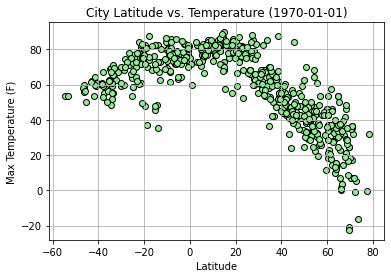

In [13]:
dte1 = clean_city_data.iloc[0]['dte']
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Temperature ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

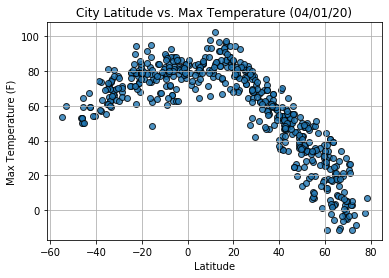

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

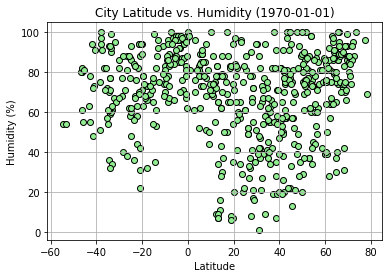

In [14]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Humidity ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

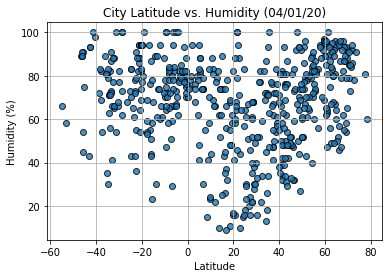

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

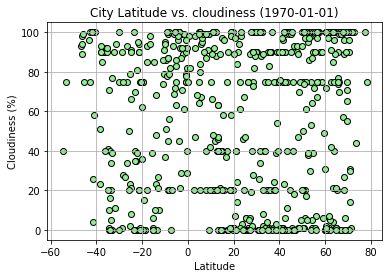

In [15]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. cloudiness ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

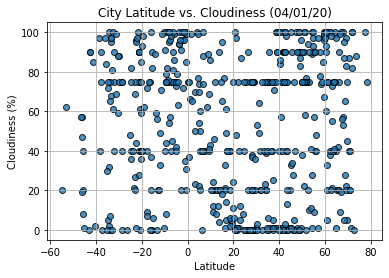

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (%)')

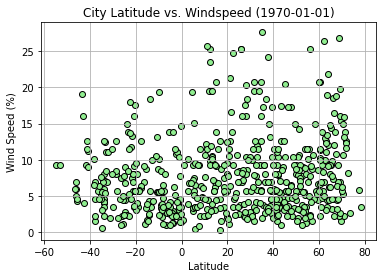

In [16]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Windspeed ({dte1})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

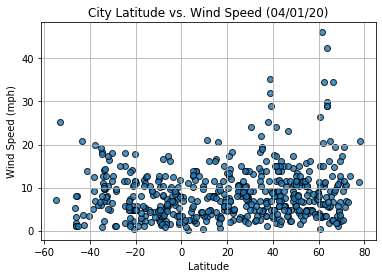

## Linear Regression

In [17]:
city_data_NH = clean_city_data[clean_city_data['Lat'] > 0]
city_data_NH

city_data_SH = clean_city_data[clean_city_data['Lat'] < 0]
city_data_SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,dte,Time
0,Putina,-15.4667,-69.4333,45.27,75,1,8.72,PE,1970-01-01 00:00:01.618705215,1970-01-01,00:00:01.618705215
2,Vaini,-21.2000,-175.2000,80.60,69,20,5.75,TO,1970-01-01 00:00:01.618705215,1970-01-01,00:00:01.618705215
3,Rikitea,-23.1203,-134.9692,77.29,68,70,5.21,PF,1970-01-01 00:00:01.618705216,1970-01-01,00:00:01.618705216
4,Ballina,-28.8667,153.5667,68.00,68,90,12.66,AU,1970-01-01 00:00:01.618705216,1970-01-01,00:00:01.618705216
5,New Norfolk,-42.7826,147.0587,62.01,78,100,4.00,AU,1970-01-01 00:00:01.618705217,1970-01-01,00:00:01.618705217
...,...,...,...,...,...,...,...,...,...,...,...
554,Orcopampa,-15.2661,-72.3417,48.09,54,0,3.83,PE,1970-01-01 00:00:01.618705388,1970-01-01,00:00:01.618705388
561,Mocajuba,-2.5842,-49.5072,73.65,97,92,2.26,BR,1970-01-01 00:00:01.618705391,1970-01-01,00:00:01.618705391
574,Vangaindrano,-23.3500,47.6000,62.10,67,35,8.50,MG,1970-01-01 00:00:01.618704888,1970-01-01,00:00:01.618704888
579,Mkwanga,-7.1180,39.2078,75.20,94,20,8.05,TZ,1970-01-01 00:00:01.618705398,1970-01-01,00:00:01.618705398


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Max temp and Latitude is -0.8728
The r-squared is: 0.7617975345990765


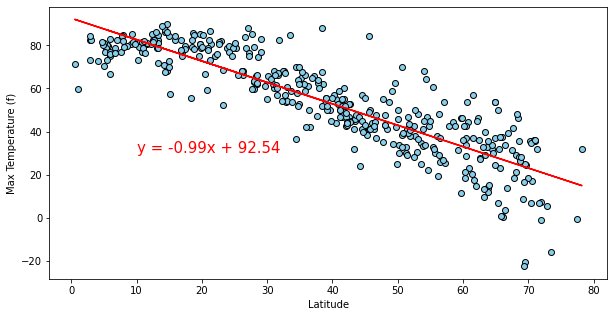

In [18]:

lati_NH = city_data_NH['Lat']
maxtemp_NH = city_data_NH['Max Temp']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, maxtemp_NH)
print(f'The correlation betwwen Northern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, maxtemp_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, maxtemp_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(10,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.46937863826630627


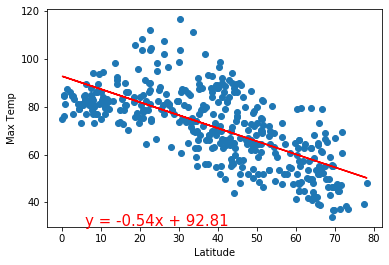

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Max temp and Latitude is 0.5777
The r-squared is: 0.3337415518408107


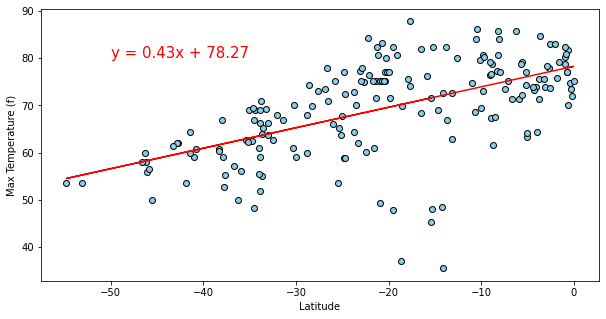

In [20]:
 
lati_SH = city_data_SH['Lat']
maxtemp_SH = city_data_SH['Max Temp']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, maxtemp_SH)
print(f'The correlation betwwen Southern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, maxtemp_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, maxtemp_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,80),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.6082708688906918


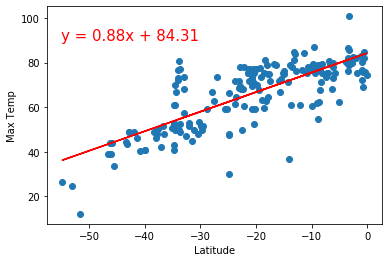

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Humidity and Latitude is 0.1826
The r-squared is: 0.033349827231720405


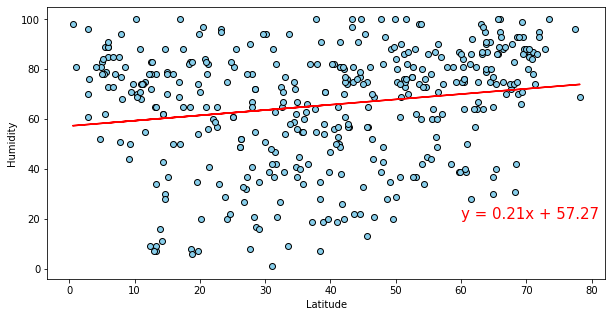

In [21]:

lati_NH = city_data_NH['Lat']
hum_NH = city_data_NH['Humidity']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, hum_NH)
print(f'The correlation betwwen Northern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, hum_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, hum_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(60,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.000543987878808455


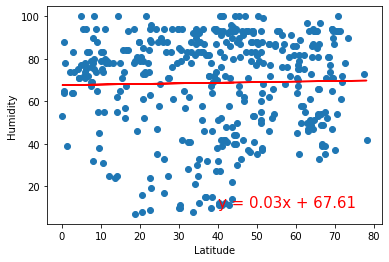

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Humidity and Latitude is 0.3279
The r-squared is: 0.10753024818188892


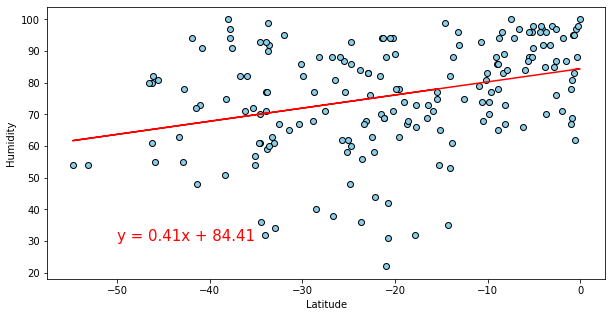

In [22]:
 
lati_SH = city_data_SH['Lat']
hum_SH = city_data_SH['Humidity']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, hum_SH)
print(f'The correlation betwwen Southern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, hum_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, hum_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity ')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.014985174297345524


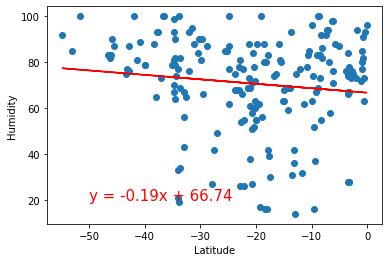

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Cloudiness and Latitude is 0.0245
The r-squared is: 0.0005992324575988298


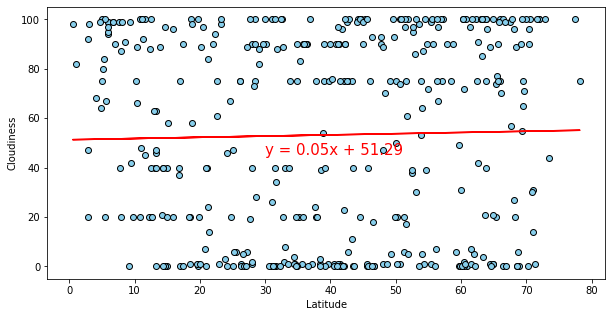

In [23]:

lati_NH = city_data_NH['Lat']
clo_NH = city_data_NH['Cloudiness']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, clo_NH)
print(f'The correlation betwwen Northern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, clo_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, clo_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(30,45),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0020898727664228514


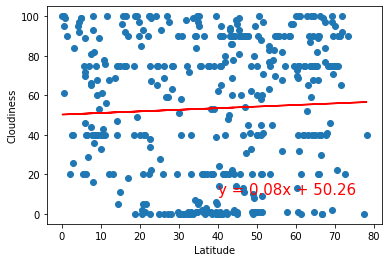

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Cloudiness and Latitude is 0.1613
The r-squared is: 0.026030275651609373


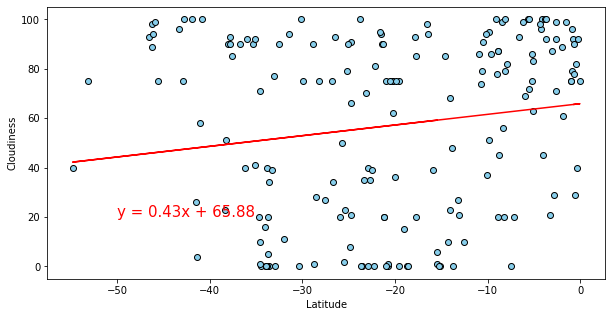

In [24]:
 
lati_SH = city_data_SH['Lat']
clo_SH = city_data_SH['Cloudiness']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, clo_SH)
print(f'The correlation betwwen Southern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, clo_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, clo_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0035263772085582894


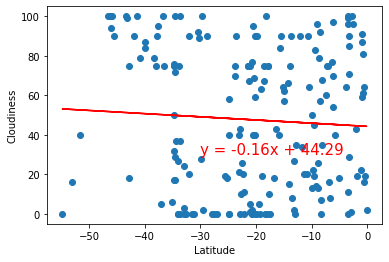

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Wind Speed and Latitude is 0.0355
The r-squared is: 0.001256897652304056


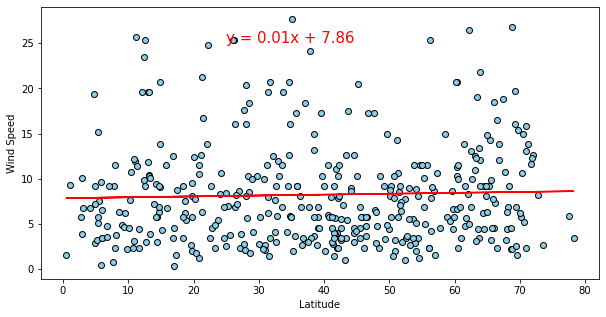

In [26]:

lati_NH = city_data_NH['Lat']
wind_NH = city_data_NH['Wind Speed']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, wind_NH)
print(f'The correlation betwwen Northern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, wind_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, wind_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(25,25),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.04019723576144484


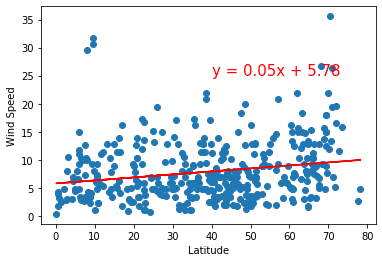

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Wind Speed and Latitude is -0.195
The r-squared is: 0.038014406454865916


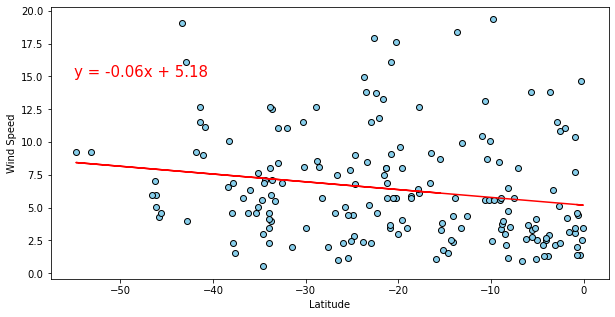

In [27]:

lati_SH = city_data_SH['Lat']
wind_SH = city_data_SH['Wind Speed']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, wind_SH)
print(f'The correlation betwwen Southern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, wind_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, wind_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-55,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.017128274759839232


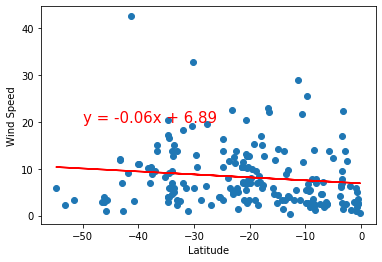